# Laboratorio de Regresión Lineal

Los atributos que relacionan los datos con nuestra variable objetivo pueden estar relacionados linealmente. Por ejemplo, ha sido utilizada en la predicción de 

* Indicadores y KPIs en empresas. 
* Indicadores macro-económicos. 
* Gestión de stock en la industria del retail.
* Entre muchos otros ejemplos.


El método de regresión lineal justamente tiene como objetivo encontrar la relación lineal que existe entre los datos X y la variable objetivo Y. Esta puede escribirse matemáticamente de la siguiente forma:
    
   $$Y=\alpha X + \beta$$

donde es necesario encontrar (o aprender a partir de los datos) cuales son los (vectores de) coeficientes $\alpha$ y (el escalar) $\beta$ que minimizan el error. Dicho de otra forma, el objetivo de un modelo de regresión es tratar de explicar la relación que existe entre una variable dependiente $Y$ que queremos predecir, un conjunto de variables independientes (variables explicativas) $X_1,..., X_n$.

¿Cómo medimos el error que queremos minimizar?
Un estándar es usar el error cuadrático medio: 

$$error=\sum_{i=1}^n (Y_r(X_i) - Y_p(X_i))^2$$

donde $Y_r(X_i)$ es el valor de la variable objetivo para los datos del conjunto de datos de prueba, y $Y_p(X_i)$ es el valor predicho para cada $X_i$ en el conjunto de datos de las variables explicativas.


In [74]:
# Iniciamos importando las liberías que necesitaremos.

# Librería para el manejo de DataFrames
import pandas as pd   

# libería de análisis numérico de mucha utilidad.
import numpy as np   

# librería de visualización
import matplotlib.pyplot as plt 

# De la librería de aprendizaje automático sklearn, 
#importamos el modelo de regresión lineal
from sklearn import linear_model 

# Finalmente importamos la función train_test_split, que como indíca su nombre
# separa los datos de entrada en un conjunto para entrenamiento, y otro para pruebas.
from sklearn.model_selection import train_test_split 

#### Objetivo:
predecir el precio de una casa en función de alguna de las variables independientes o atributos que podamos tener. En este caso, utilizaremos un conjunto de datos disponible en la misma librería sklearn.

In [75]:
# cargamos la sublibrería de conjuntos de datos:
from sklearn.datasets import load_boston

In [76]:
# y cargamos los datos a utilizar en la variable boston.
boston=load_boston()

In [77]:
# podemos mirar de que tipo son los datos en dicha variable:
type(boston)

sklearn.utils.Bunch

In [58]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

Tenemos un número total de atributos:

In [93]:
print(len(boston.feature_names))

13


In [59]:
# Para trabajar con estructuras mas agradables, utilizamos la librería
# pandas para construir los dataframes correspondientes a los datos y variable 
# objetivo dependiente de estos.
df_x=pd.DataFrame(boston.data,columns=boston.feature_names)
df_y=pd.DataFrame(boston.target)

In [60]:
# Un método muy util de estas estructuras es el método describe() que da un
# resumen de métricas de mayor relevancia.
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Dicho esto, procedemos a inicializar nuestro modelo de regresión lineal. Esto lo hacemos invocandolo desde la librería scikit-learn a través de:

In [ ]:
reg=linear_model.LinearRegression()

Separamos los datos que utilizaremos para el entrenamiento y los datos que utilizaremos luego para probar la eficiencia de nuestro modelo usando la función train_test_split de scikit-learn. Separaremos los datos dejando el 20% como datos de prueba y el 80% como datos de entrenamiento.

In [78]:
x_train, x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2)

Una vez separados los datos, usamos x_train y y_train para entrenar/ajustar el modelo. Esto lo hacemos con el método fit.

In [79]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
print('los coeficientes del modelo son \n'+str(reg.coef_[0]))

los coeficientes del modelo son 
[-1.05860348e-01  5.11363454e-02  4.52199105e-02  2.35150639e+00
 -1.84767939e+01  3.45541632e+00  7.12270235e-03 -1.51143052e+00
  3.20541767e-01 -1.27596384e-02 -9.68439185e-01  9.05004344e-03
 -5.89510835e-01]


In [91]:
print('y el escalar $\beta$ es '+str(reg.intercept_[0]))

y el escalar $eta$ es 39.589958451994875


Recordar que eran 13 atributos, de manera que debemos tener el mismo número de coeficientes. En efecto:

In [92]:
len(reg.coef_[0])

13

Calculamos ahora las predicciones sobre el conjunto de datos de prueba, usando el método predict.

In [96]:
y_prediction=reg.predict(x_test)

Finalmente ver que tan buena es nuestra predicción versus los valores provenientes de los datos. Si la predicción es buena, al graficar la predicción versus los datos que debían predecirse, deberían desplegarse en una linea (función identidad y=x). Entre mas cercana esté la nube de puntos a la función identidad, mas precisa será la predicción.   

In [97]:
y_test=np.array(y_test)
y_prediction=np.array(y_prediction)

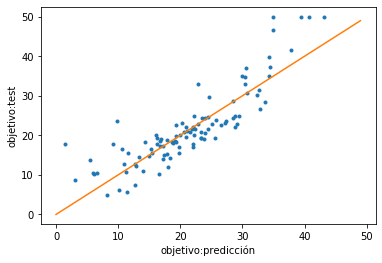

In [100]:
plt.figure()
plt.plot(y_prediction,y_test, '.')
plt.plot(range(50),range(50))
plt.xlabel('objetivo:predicción')
plt.ylabel('objetivo:test')
plt.show()

Observar que los datos están alrededor de la recta dada por la función identidad. Sin embargo, sabemos que el problema de asignarle el costo a una casa es altamente complejo, no-lineal, y depende de factores algunas veces volátiles, como la economía del país, segregación social, modificaciones internas, y no solo de los aspectos mas visibles como tamaño, antigüedad y número de habitaciones. Finalmente, medimos el error cuadrático medio encontrado por el algoritmo de regresión lineal:

In [102]:
from sklearn.metrics import mean_squared_error 

In [103]:
print(mean_squared_error(y_prediction, y_test))

23.259987818768664


Pregunta abierta
¿Es posible mejorar este valor de alguna forma?, ¿que método utilizaría?. 

Investigue sobre redes neuronales tipo perceptrón. 

Proyecto a futuro: ¿Que valores alcanzaría un fit con una red neuronal multicapa con neuronas tipo perceptron?